<table>
<tr>                                                                                   
     <th>
         <div style='padding:15px;color:#030aa7;font-size:240%;text-align: center;font-style: italic;font-weight: bold;font-family: Georgia, serif'><a href="https://www.kaggle.com/datasets/uciml/iris">Jeu de données Iris - Iris de Fisher ou Iris d'Anderson</a></div>
     </th>
     <th><img src="https://raw.githubusercontent.com/rbizoi/MachineLearning/refs/heads/master/images/iris.jpg" width="96"></th>
 </tr>
</table>

<table>
    <tr>                                                                                   
         <th  style="text-align:left;background-color:#053061;color:white;">Setosa</th>
         <th  style="text-align:left;background-color:#053061;color:white;">Virginica</th>
         <th  style="text-align:left;background-color:#053061;color:white;">Versicolor</th>
    </tr>
    <tr>
        <th  style="text-align:left"><img src="https://raw.githubusercontent.com/rbizoi/MachineLearning/refs/heads/master/images/iris_setosa.jpg" width="512"></th>
        <th  style="text-align:left"><img src="https://raw.githubusercontent.com/rbizoi/MachineLearning/refs/heads/master/images/iris_virginica.jpg" width="512"></th>
        <th  style="text-align:left"><img src="https://raw.githubusercontent.com/rbizoi/MachineLearning/refs/heads/master/images/iris_versicolor.jpg" width="512"></th>
    </tr>
</table>


<div style='padding:15px;color:#030aa7;font-size:100%;text-align: left;font-family: Georgia, serif'><a href="https://archive.ics.uci.edu/dataset/53/iris">Veuillez vous référer à la page UC Irvine Machine Learning Repository officielle pour plus de détails.</a></div>

# <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Introduction</div></b>
## <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Import libriries </div></b>

In [80]:
import pandas as pd, numpy as np, seaborn as sns, warnings, os
from datetime import datetime as dt
from matplotlib import pyplot as plt

import matplotlib.font_manager as fm
import plotly.express as px
import plotly.graph_objs as go
import graphviz, pydotplus
from IPython.display import Image
import re
from scipy.cluster.hierarchy import linkage, dendrogram


warnings.filterwarnings(action="ignore")

if int(str(sns.__version__).split('.')[1]) > 8 : 
    plt.style.use('seaborn-v0_8-darkgrid')
else:
    plt.style.use('seaborn-darkgrid')
sns.set(font_scale=3)

os.chdir("C:/Users/etien/Documents/CCI/_HUB/cours/2024-2025/big_data/_git/MachineLearning/donnees/Iris")



In [81]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from sklearn.tree import DecisionTreeClassifier,export_graphviz

## <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Outils du document</div></b>

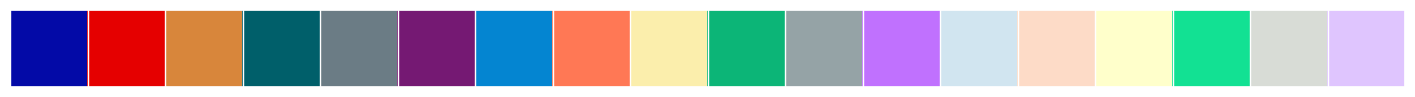

In [82]:
palette = [ "#030aa7", "#e50000", "#d8863b", "#005f6a", "#6b7c85", "#751973", 
            "#0485d1", "#ff7855", "#fbeeac", "#0cb577", "#95a3a6", "#c071fe", 
            "#d1e5f0", "#fddbc7", "#ffffcb", "#12e193", "#d8dcd6", "#dfc5fe", 
          ]
sns.palplot(sns.color_palette(palette))

In [83]:
def formatPct(pct, allvals):
    total = int(round(pct/100. * np.sum(allvals)))
    return "{:.2f}%\n({:d})".format(pct, total)    

In [84]:
def affichageDistribution(colonne,couleur,ax, nom=''):
    graph = sns.distplot(colonne, color=couleur, ax=ax)
    graph.set(ylabel=None)
    moyenne, mediane = float(colonne.mean()), \
                   float(colonne.median())
    
    ax.axvline(moyenne, color='g', linestyle='-', label=f"{nom:12s} mean   = {moyenne:0.4f}", lw=2)
    ax.axvline(mediane, color='b', linestyle='--', label=f"{nom:12s} median = {mediane:0.4f}", lw=2)
    graph.legend(loc="upper right")

In [85]:
def afficheDendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Classification Hiérarchique Ascendante')
        plt.xlabel('Villes ou (taille du cluster)')
        plt.ylabel('Distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

# <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Lecture des données</div></b>

<table>
    <tr> 
        <th  style="text-align:left">
            <table>
                <CAPTION style='padding:15px;color:#030aa7;font-size:150%;text-align: left;font-weight: bold;font-family: Georgia, serif'>Iris.csv</CAPTION>    
            <tr>                                                                                   
                <tr>                                                                                   
                     <th  style="text-align:left;background-color:#053061;color:white;">Colonne initiale </th>
                     <th  style="text-align:left;background-color:#053061;color:white;">Description</th>
                </tr>
                <tr>
                    <th  style="text-align:left">Id</th>
                    <th  style="text-align:left">Index</th>
                </tr>
                <tr>
                    <th  style="text-align:left">SepalLengthCm</th>
                    <th  style="text-align:left">Longueur du sépale en cm</th>
                </tr>
                <tr>
                    <th  style="text-align:left">SepalWidthCm</th>
                    <th  style="text-align:left">Largeur du sépale en cm</th>
                </tr>
                <tr>
                    <th  style="text-align:left">PetalLengthCm</th>
                    <th  style="text-align:left">Longueur du pétale en cm</th>
                </tr>
                <tr>
                    <th  style="text-align:left">PetalWidthCm</th>
                    <th  style="text-align:left">Largeur du pétale en cm</th>
                </tr>
                <tr>
                    <th  style="text-align:left;color:red;">Species</th>
                    <th  style="text-align:left;color:red;">Classe d'iris : Iris Setosa, Iris Versicolour ou Iris Virginica</th>
                </tr>
            </table>
        </th>
        <th  style="text-align:left"><img src="https://raw.githubusercontent.com/rbizoi/MachineLearning/refs/heads/master/images/iris_description.jpg" width="1024"></th>
    </tr>
</table>

In [86]:
donnees = pd.read_csv('Iris.csv')
donnees.Species = donnees.Species.apply(lambda x : x.replace('Iris-',''))
donnees.columns = [colonne.replace('Cm','') if colonne != 'Species' else colonne for colonne in donnees.columns]
donnees.set_index('Id',inplace=True)
donnees.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [87]:
donnees.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Espèces de iris</div></b>

In [88]:
donnees.Species.sort_values().unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [89]:
dict_species = {nom:i for i, nom in enumerate(donnees.Species.sort_values().unique())}
dictR_species = {i:nom for i, nom in enumerate(donnees.Species.sort_values().unique())}
dict_species,dictR_species

({'setosa': 0, 'versicolor': 1, 'virginica': 2},
 {0: 'setosa', 1: 'versicolor', 2: 'virginica'})

In [90]:
donnees.Species = donnees.Species.apply(lambda x: dict_species[x])

# <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Statistiques descriptives et analyse de données</div></b>

## <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Couleurs variables qualitatives</div></b>

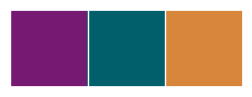

In [91]:
couleursEspece = {nom:couleur for nom,couleur in zip(donnees.Species.sort_values().unique(),["#751973","#005f6a","#d8863b"])}
couleursEspeceNom = {dictR_species[num]:couleursEspece[num] for num in couleursEspece}
sns.palplot(sns.color_palette(couleursEspece.values()))

## <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Statistiques  descriptives</div></b>

In [92]:
donnees.sample(5)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
Id,,,,,
75,6.4,2.9,4.3,1.3,1
47,5.1,3.8,1.6,0.2,0
46,4.8,3.0,1.4,0.3,0
99,5.1,2.5,3.0,1.1,1
92,6.1,3.0,4.6,1.4,1


In [93]:
donnees.describe().style.format("{:0.2f}") #.background_gradient(cmap=plt.get_cmap('Blues'),axis=0)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
count,150.00,150.00,150.00,150.00,150.00
mean,5.84,3.05,3.76,1.20,1.00
std,0.83,0.43,1.76,0.76,0.82
min,4.30,2.00,1.00,0.10,0.00
25%,5.10,2.80,1.60,0.30,0.00
50%,5.80,3.00,4.35,1.30,1.00
75%,6.40,3.30,5.10,1.80,2.00
max,7.90,4.40,6.90,2.50,2.00


In [94]:
donnees.columns

Index(['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species'], dtype='object')

## <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Structure de l’échantillon des données </div></b>

In [95]:
donnees.sample(5)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
Id,,,,,
20,5.1,3.8,1.5,0.3,0
23,4.6,3.6,1.0,0.2,0
86,6.0,3.4,4.5,1.6,1
69,6.2,2.2,4.5,1.5,1
24,5.1,3.3,1.7,0.5,0


In [96]:
donnees.groupby(['Species']).SepalLength.count().reset_index()

,Species,SepalLength
0,0,50
1,1,50
2,2,50


## <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Distribution de l’échantillon des données </div></b>

In [97]:
donnees.sample(5)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
Id,,,,,
32,5.4,3.4,1.5,0.4,0
70,5.6,2.5,3.9,1.1,1
16,5.7,4.4,1.5,0.4,0
130,7.2,3.0,5.8,1.6,2
138,6.4,3.1,5.5,1.8,2


## <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Centrage et réduction des données</div></b>
<table>
<tr>
<th><img src="https://raw.githubusercontent.com/rbizoi/MachineLearning/refs/heads/master/images/moyenne.png"></th>
<th><img src="https://raw.githubusercontent.com/rbizoi/MachineLearning/refs/heads/master/images/ecart_type.png"></th>
<th><img src="https://raw.githubusercontent.com/rbizoi/MachineLearning/refs/heads/master/images/centrage_reduction.png"></th>
</tr>
</table>

In [98]:
modelStd = StandardScaler()
modelStd.fit(donnees.drop(columns='Species'))

donnees[donnees.drop(columns='Species').columns] = modelStd.transform(donnees.drop(columns='Species'))
donnees.drop(columns='Species').head()

,SepalLength,SepalWidth,PetalLength,PetalWidth
Id,,,,
1,-0.900681,1.032057,-1.341272,-1.312977
2,-1.143017,-0.124958,-1.341272,-1.312977
3,-1.385353,0.337848,-1.398138,-1.312977
4,-1.506521,0.106445,-1.284407,-1.312977
5,-1.021849,1.263460,-1.341272,-1.312977


# Analyse des composantes principales

In [99]:
modelPCA = PCA(svd_solver='full')
modelPCA.fit(donnees)

PCA(svd_solver='full')

In [100]:
modelPCA.explained_variance_ratio_.cumsum()*100

array([ 75.39502864,  95.13807379,  98.85747855,  99.56328817,
       100.        ])

In [101]:
modelPCA.explained_variance_*100

array([354.20483252,  92.75256112,  17.47371364,   3.31588411,
         2.05166632])

In [102]:
modelPCA.n_components_
inertie = pd.DataFrame(modelPCA.explained_variance_ratio_,columns=['Inertie']) 
inertie['Label'] = np.round(modelPCA.explained_variance_ratio_.cumsum()*100,2)
inertie['Dimension'] = range(1,len(modelPCA.explained_variance_)+1)
inertie['Inertie'] = np.round(inertie['Inertie']*100,2)
dim = modelPCA.n_components_
inertie = inertie[inertie['Dimension']<= dim]

# Choix du nombre de dimension

In [103]:
sum(modelPCA.explained_variance_ratio_.cumsum()*100 <= 95) + 1

inertie[inertie.Dimension <= sum(modelPCA.explained_variance_ratio_.cumsum()*100 <= 95) + 1]

,Inertie,Label,Dimension
0,75.40,75.40,1
1,19.74,95.14,2


## Pourcentage d'inertie(variance) associée à chaque dimension

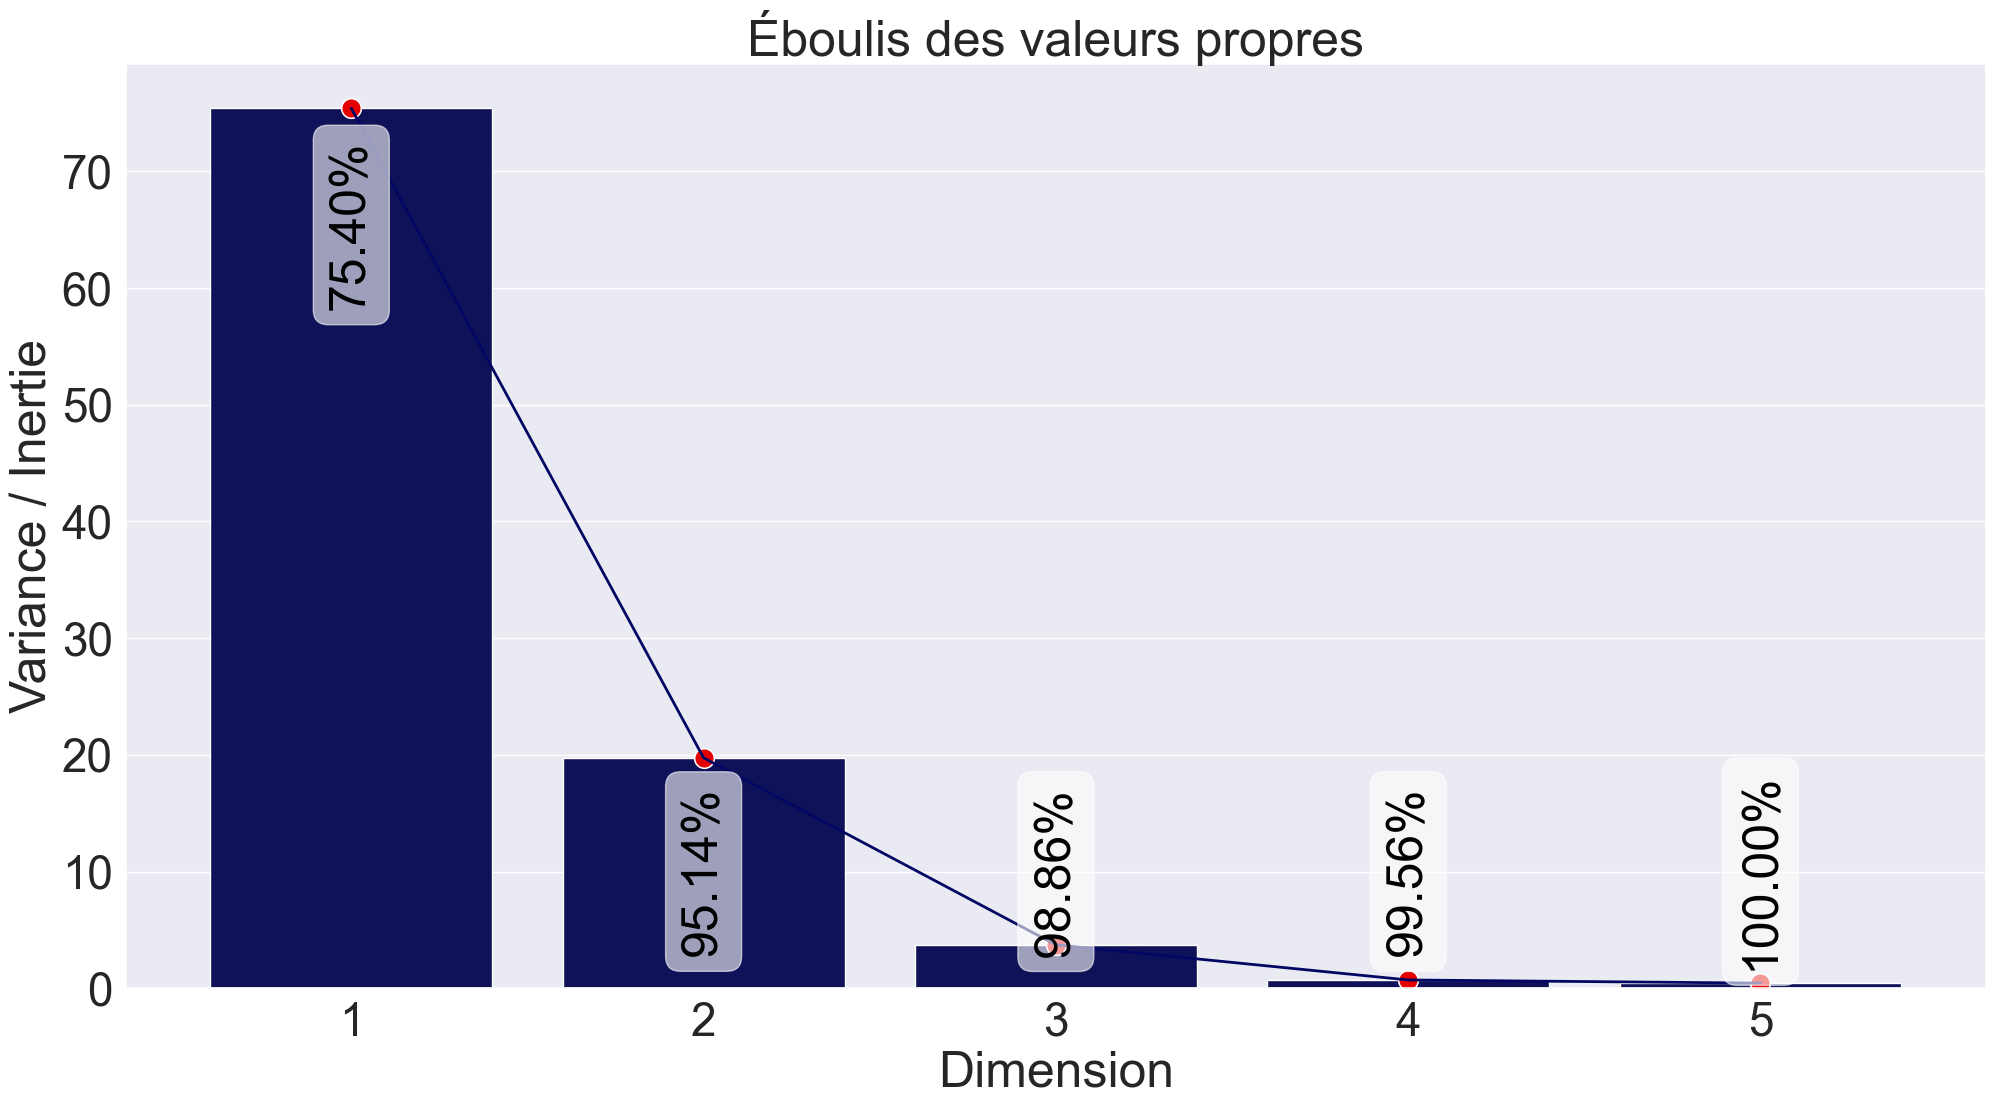

In [104]:
fig, ax = plt.subplots(figsize=(24,12));
graph = sns.barplot(x="Dimension",y='Inertie', data=inertie[inertie.Dimension <= 10], color="#030764", ax=ax)

for i,(nom,valeur) in enumerate(zip(inertie[inertie.Dimension <= 10].sort_values('Dimension').Label,inertie.sort_values('Dimension').Inertie)):
    # valeur = 0.1 if valeur - 0.1 < 0.1 else valeur - 0.1
    valeur = 10 if valeur - 10 < 10 else valeur - 10
    delta =  i 
    graph.text(
                delta ,
                valeur,
                f'{nom:0.2f}%',
                color='black',
                rotation='vertical',
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.6),
                verticalalignment='center',
                horizontalalignment='center',
               )
    
graph = sns.lineplot( x=inertie[inertie.Dimension <= 10].Dimension - 1,
                      y='Inertie',
                      data=inertie,
                      estimator = None, 
                      lw        = 2, 
                      ci        = None,
                      color     = "#030764",
                      ax    = ax);

sns.scatterplot(x=inertie[inertie.Dimension <= 10].Dimension - 1,
                y     = 'Inertie',
                data  = inertie,
                s     = 200,
                # ci    = None, 
                color = "#e50000",
                ax    = ax);    
    
ax.set_xlabel('Dimension')
ax.set_ylabel('Variance / Inertie')
ax.set_title('Éboulis des valeurs propres')

#sauvegarderImage('Choix du nombre des dimensions01--Temperatures')
sns.set(font_scale=2)

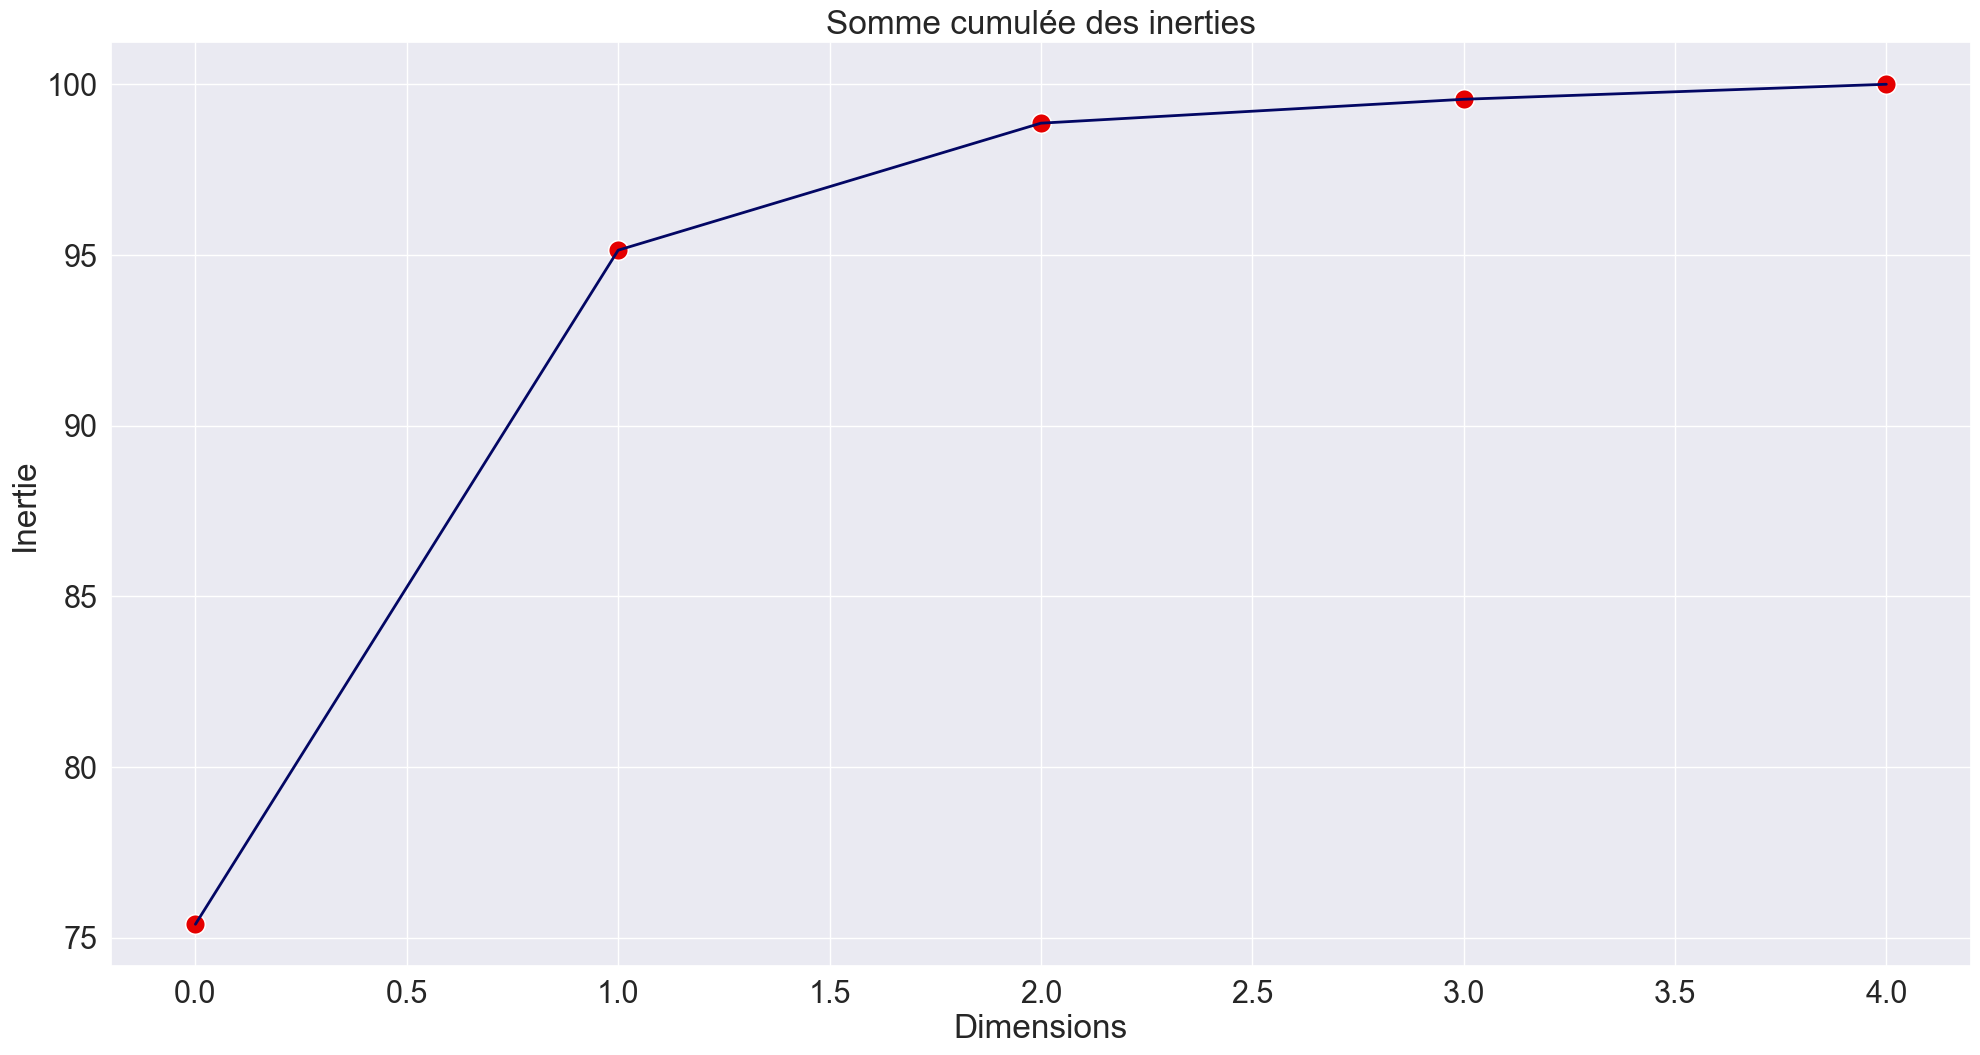

In [105]:
fig, ax = plt.subplots(figsize=(24,12));

sns.lineplot(x         = inertie[inertie.Dimension <= 10].Dimension-1,
             y         = 'Label',
             data      = inertie,
             estimator = None, 
             lw        = 2, 
             color     = "#030764",
             ax        = ax);
sns.scatterplot(x     = inertie[inertie.Dimension <= 10].Dimension-1,
                y     = 'Label',
                data  = inertie,
                s     = 200,
                color = "#e50000",
                ax    = ax);

ax.set_xlabel('Dimensions');
ax.set_ylabel('Inertie');
ax.set_title('Somme cumulée des inerties');
#sauvegarderImage('Choix du nombre des dimensions02--Temperatures')

## Règle Kaiser

In [106]:
print(f'{100 / modelPCA.n_components_}')

20.0


In [107]:
inertie[inertie.Inertie >= (100 / modelPCA.n_components_)]

,Inertie,Label,Dimension
0,75.4,75.4,1


## Choix des dimensions 

Selon les Ebouli propre de valeur nous prendrons les deux première dimensions.

# Transformation des valeurs 

In [108]:
donnees

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
Id,,,,,
1,-0.900681,1.032057,-1.341272,-1.312977,0
2,-1.143017,-0.124958,-1.341272,-1.312977,0
3,-1.385353,0.337848,-1.398138,-1.312977,0
4,-1.506521,0.106445,-1.284407,-1.312977,0
5,-1.021849,1.263460,-1.341272,-1.312977,0
...,...,...,...,...,...
146,1.038005,-0.124958,0.819624,1.447956,2
147,0.553333,-1.281972,0.705893,0.922064,2
148,0.795669,-0.124958,0.819624,1.053537,2


In [109]:
n_components = 2 
# permet de se souvenir du nombre de composantes à garder (nom de colonnes)
modelPCA = PCA(n_components=n_components).set_output(transform="pandas")
donneesACP = modelPCA.fit_transform(donnees)
donneesACP.columns = [f'Dimension{i:02d}' for i in range(1,n_components+1)]

In [110]:
donneesACP.corr().style.format("{:0.1e}").background_gradient(cmap=plt.get_cmap('Blues'),axis=0)

,Dimension01,Dimension02
Dimension01,1.0e+00,6.5e-16
Dimension02,6.5e-16,1.0e+00


In [111]:
donneesACP

,Dimension01,Dimension02
Id,,
1,-2.476965,0.500585
2,-2.313886,-0.659120
3,-2.567994,-0.324384
4,-2.509251,-0.580856
5,-2.588980,0.668663
...,...,...
146,2.118469,0.385062
147,1.835538,-0.904895
148,1.800721,0.266694


# Représentation des individus

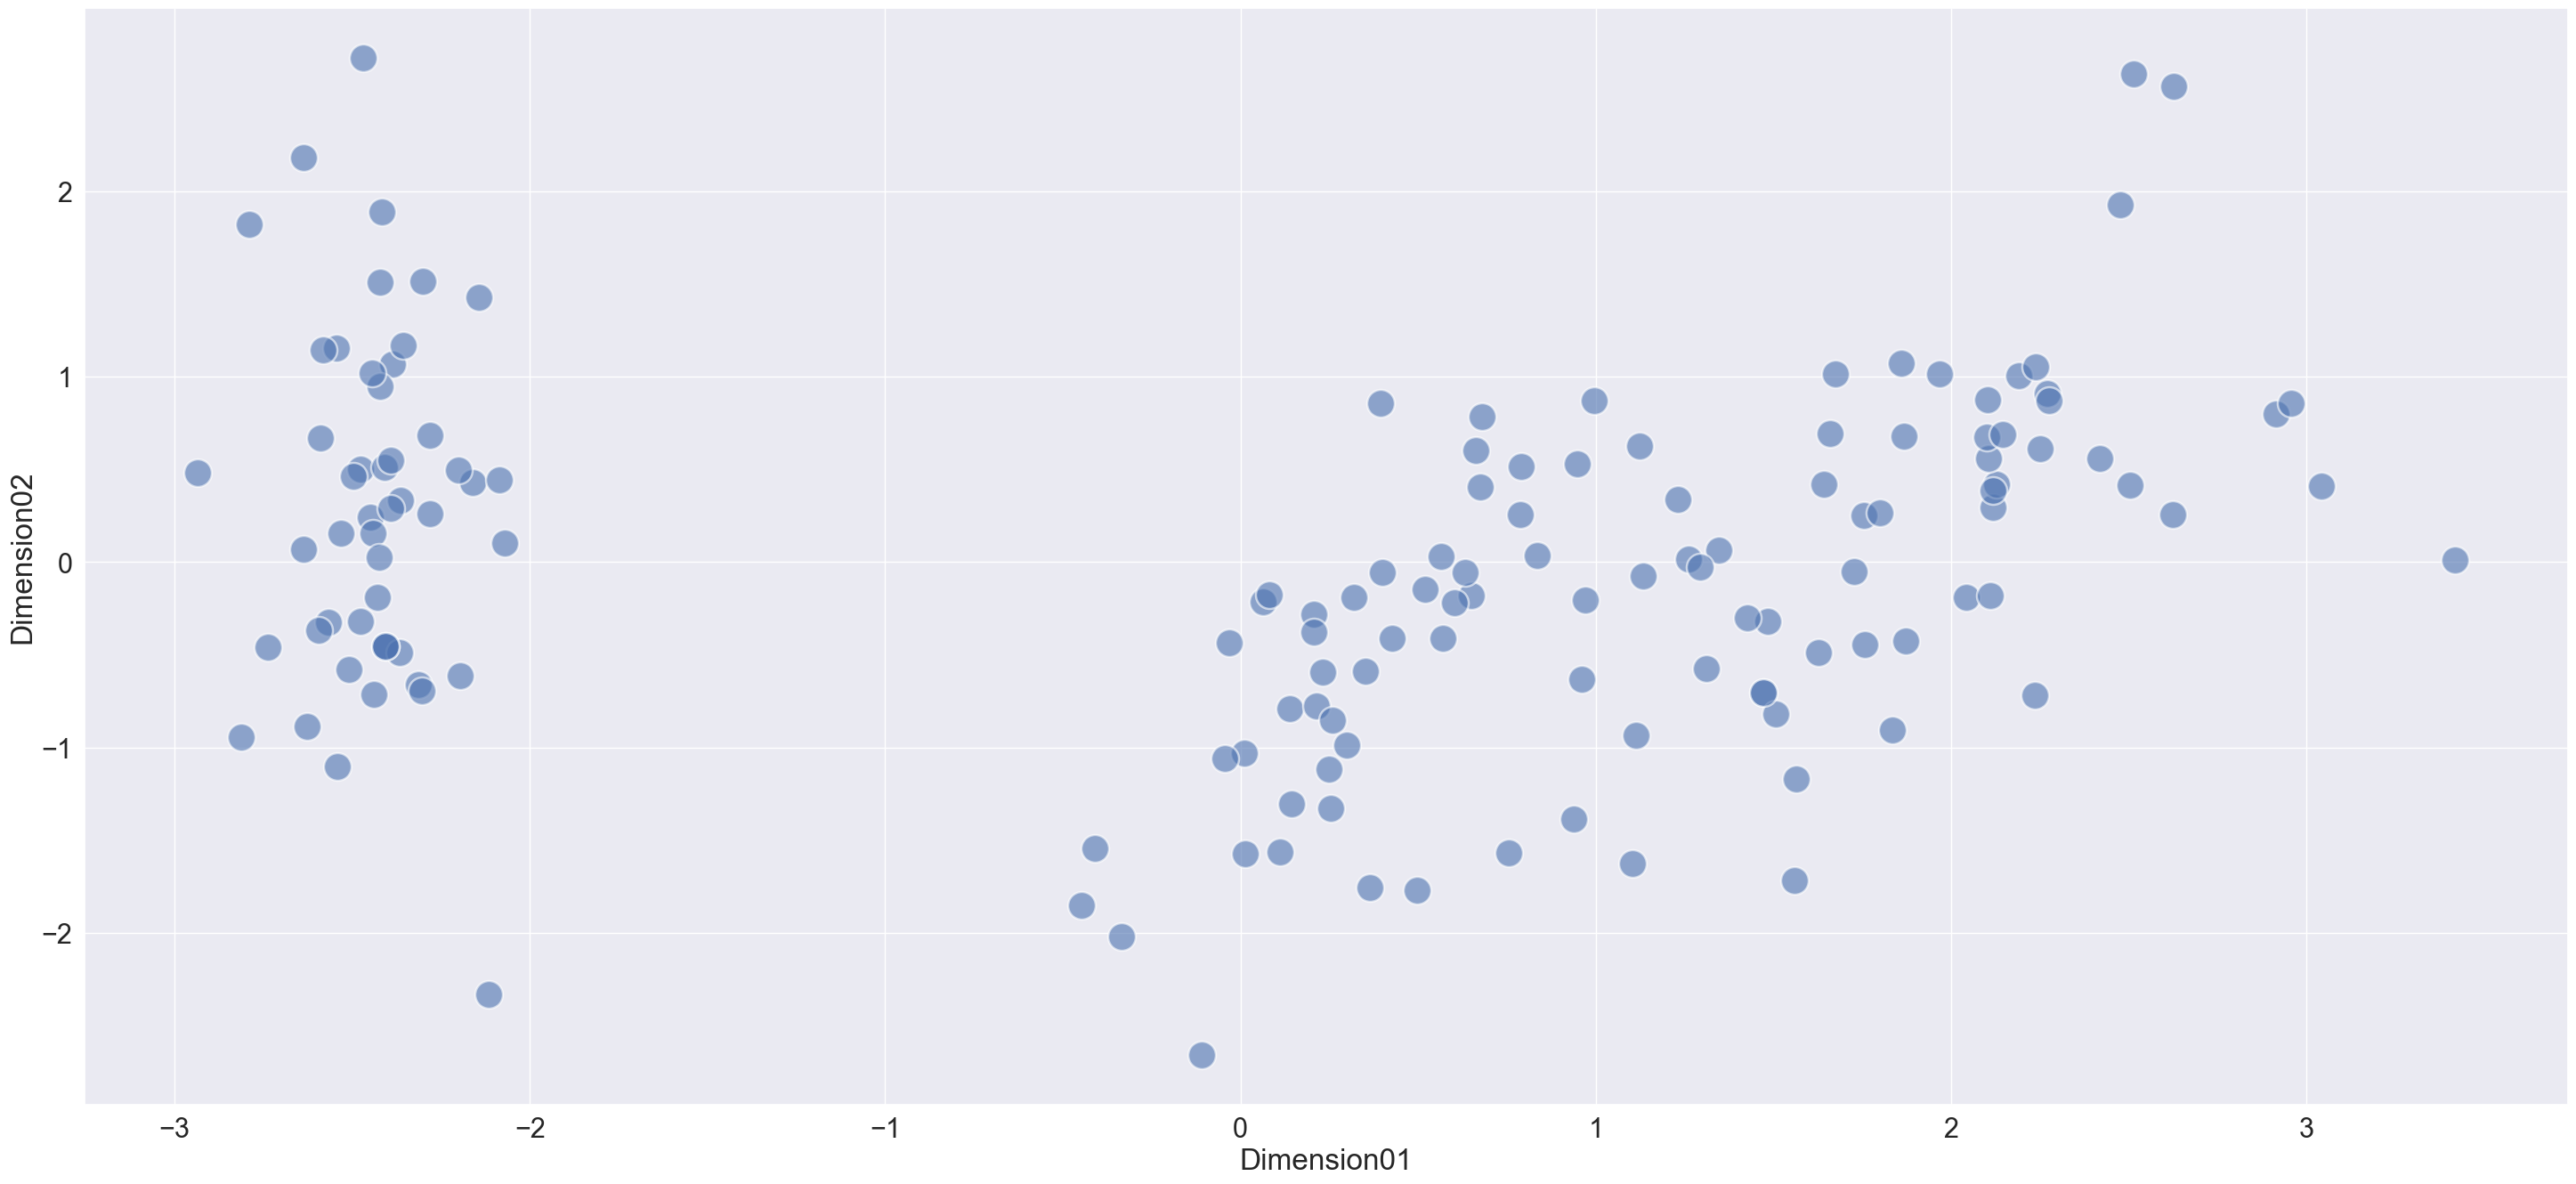

In [112]:
fig, ax = plt.subplots(figsize=(36,16));

sns.scatterplot(x       = 'Dimension01', 
                y       = 'Dimension02',
                # size    = 'Altitude', 
               # hue     = 'Id', 
                data    = donneesACP,
                s       = 500,
                palette = palette,
                alpha=0.6,
                ax=ax
                )

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y']+.02, str(point['val']), rotation=0)
donneesACP.reset_index(inplace=True)
#label_point(donneesACP.Dimension01, donneesACP.Dimension02, donneesACP.Id, ax)     
#label_point(donneesACP.Dimension01, donneesACP.Dimension02, donneesACP, ax)     

{'icoord': [[25.0, 25.0, 35.0, 35.0],
  [45.0, 45.0, 55.0, 55.0],
  [30.0, 30.0, 50.0, 50.0],
  [85.0, 85.0, 95.0, 95.0],
  [75.0, 75.0, 90.0, 90.0],
  [65.0, 65.0, 82.5, 82.5],
  [40.0, 40.0, 73.75, 73.75],
  [105.0, 105.0, 115.0, 115.0],
  [165.0, 165.0, 175.0, 175.0],
  [155.0, 155.0, 170.0, 170.0],
  [145.0, 145.0, 162.5, 162.5],
  [135.0, 135.0, 153.75, 153.75],
  [125.0, 125.0, 144.375, 144.375],
  [110.0, 110.0, 134.6875, 134.6875],
  [185.0, 185.0, 195.0, 195.0],
  [235.0, 235.0, 245.0, 245.0],
  [225.0, 225.0, 240.0, 240.0],
  [215.0, 215.0, 232.5, 232.5],
  [265.0, 265.0, 275.0, 275.0],
  [295.0, 295.0, 305.0, 305.0],
  [285.0, 285.0, 300.0, 300.0],
  [270.0, 270.0, 292.5, 292.5],
  [255.0, 255.0, 281.25, 281.25],
  [223.75, 223.75, 268.125, 268.125],
  [205.0, 205.0, 245.9375, 245.9375],
  [190.0, 190.0, 225.46875, 225.46875],
  [315.0, 315.0, 325.0, 325.0],
  [355.0, 355.0, 365.0, 365.0],
  [345.0, 345.0, 360.0, 360.0],
  [375.0, 375.0, 385.0, 385.0],
  [352.5, 352.5, 380.0

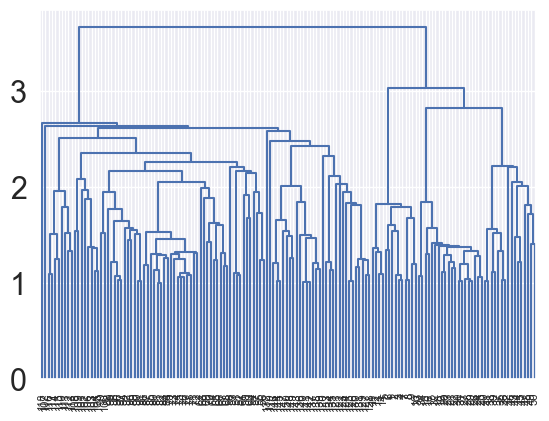

In [118]:
linkage_matrix = linkage(donneesACP, method='single', metric='euclidean', optimal_ordering=False)

dendrogram(linkage_matrix, labels=donnees.index, color_threshold=0, leaf_font_size=8)

{'icoord': [[25.0, 25.0, 35.0, 35.0],
  [45.0, 45.0, 55.0, 55.0],
  [30.0, 30.0, 50.0, 50.0],
  [85.0, 85.0, 95.0, 95.0],
  [75.0, 75.0, 90.0, 90.0],
  [65.0, 65.0, 82.5, 82.5],
  [40.0, 40.0, 73.75, 73.75],
  [105.0, 105.0, 115.0, 115.0],
  [165.0, 165.0, 175.0, 175.0],
  [155.0, 155.0, 170.0, 170.0],
  [145.0, 145.0, 162.5, 162.5],
  [135.0, 135.0, 153.75, 153.75],
  [125.0, 125.0, 144.375, 144.375],
  [110.0, 110.0, 134.6875, 134.6875],
  [185.0, 185.0, 195.0, 195.0],
  [235.0, 235.0, 245.0, 245.0],
  [225.0, 225.0, 240.0, 240.0],
  [215.0, 215.0, 232.5, 232.5],
  [265.0, 265.0, 275.0, 275.0],
  [295.0, 295.0, 305.0, 305.0],
  [285.0, 285.0, 300.0, 300.0],
  [270.0, 270.0, 292.5, 292.5],
  [255.0, 255.0, 281.25, 281.25],
  [223.75, 223.75, 268.125, 268.125],
  [205.0, 205.0, 245.9375, 245.9375],
  [190.0, 190.0, 225.46875, 225.46875],
  [315.0, 315.0, 325.0, 325.0],
  [355.0, 355.0, 365.0, 365.0],
  [345.0, 345.0, 360.0, 360.0],
  [375.0, 375.0, 385.0, 385.0],
  [352.5, 352.5, 380.0

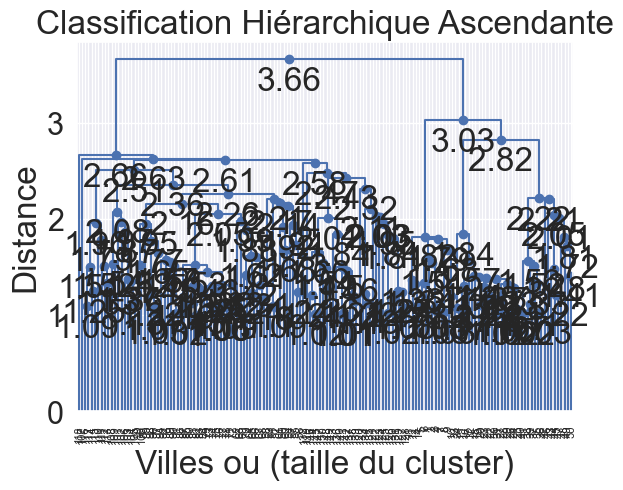

In [119]:
afficheDendrogram(linkage_matrix, labels=donnees.index, color_threshold=0, leaf_font_size=8)